In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math

import my_lib_santanastasio as my

import rotolamento as rt

Angolo= 0.431 ± 0.0 [Rad] [0.00%]
Angolo= 24.709 ± 0.009 [Deg] [0.04%]


Angolo= 0.429 ± 0.0 [Rad] [0.00%]
Angolo= 24.583 ± 0.014 [Deg] [0.06%]


Angolo= 0.431 ± 0.0 [Rad] [0.00%]
Angolo= 24.672 ± 0.004 [Deg] [0.02%]




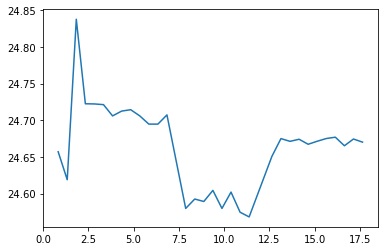

In [2]:
file_name = 'misure_2/Angolo25NEW/plane.csv'

df_angle = pd.read_csv(file_name)
    
angle = df_angle['Inclination (deg)'].to_numpy()
time = df_angle['t (s)'].to_numpy()

intervals = [
    [2.5,7.5],
    [7.5,12],
    [13,17.5],
]

angle_mean = []

plt.plot(time[:],angle[:])

for x in intervals:
    s = rt.time_to_index(time,x[0])
    f = rt.time_to_index(time,x[1])

    #plt.plot(time[s:f],angle[s:f])
    angle_mean.append(rt.get_angle(angle[s:f]))
    print("\n")

angle_mean = np.array(angle_mean)


In [3]:
angle_best = angle_mean[:,0].mean()
sangle_best = np.std(angle_mean[:,0], ddof=1)/np.sqrt(len(angle_mean))

In [4]:
rt.PrintResult("Angle Best: ",angle_best,sangle_best,3,"[rad]")


Angle Best: = 0.43 ± 0.001 [rad] [0.23%]


In [5]:
convert_factor = 180/np.pi
rt.PrintResult("Angle Best: ",angle_best*convert_factor,sangle_best*convert_factor,3,"[deg]")

Angle Best: = 24.655 ± 0.037 [deg] [0.15%]


In [6]:
dtab = pd.DataFrame(data={
    'Angolo [deg]' : [24.709,24.583,24.672],
    'Sigma Angolo' : [0.009,0.014,0.004],
})

dtab

,Angolo [deg],Sigma Angolo
0,24.709,0.009
1,24.583,0.014
2,24.672,0.004


In [7]:
print (dtab.to_latex(index=False,formatters={'h': '{:.0E}'.format,'D': '{:.1f}'.format, 'V': '{:0.1E}'.format}))

\begin{tabular}{rr}
\toprule
 Angolo [deg] &  Sigma Angolo \\
\midrule
       24.709 &         0.009 \\
       24.583 &         0.014 \\
       24.672 &         0.004 \\
\bottomrule
\end{tabular}

